In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/pak-wheels/PakWheelsDataSet.csv', index_col=0)

                                             |          | [  0%]   00:00 -> (? left)


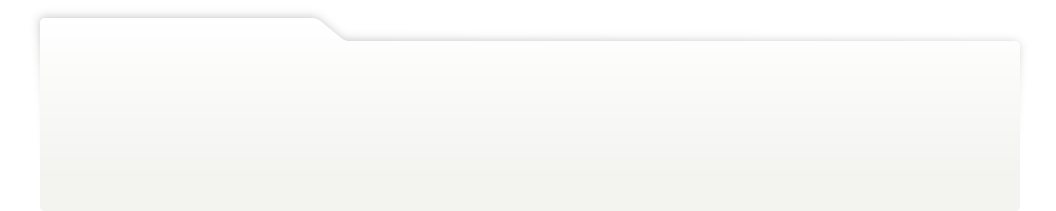
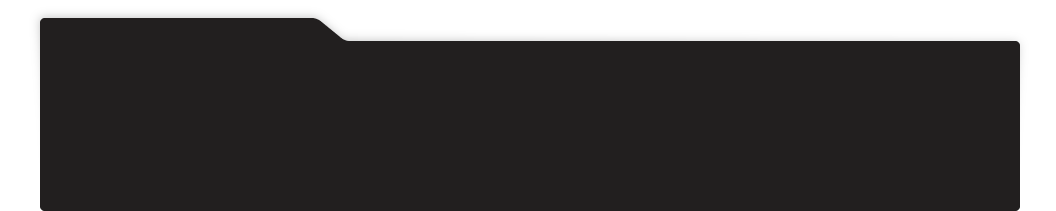
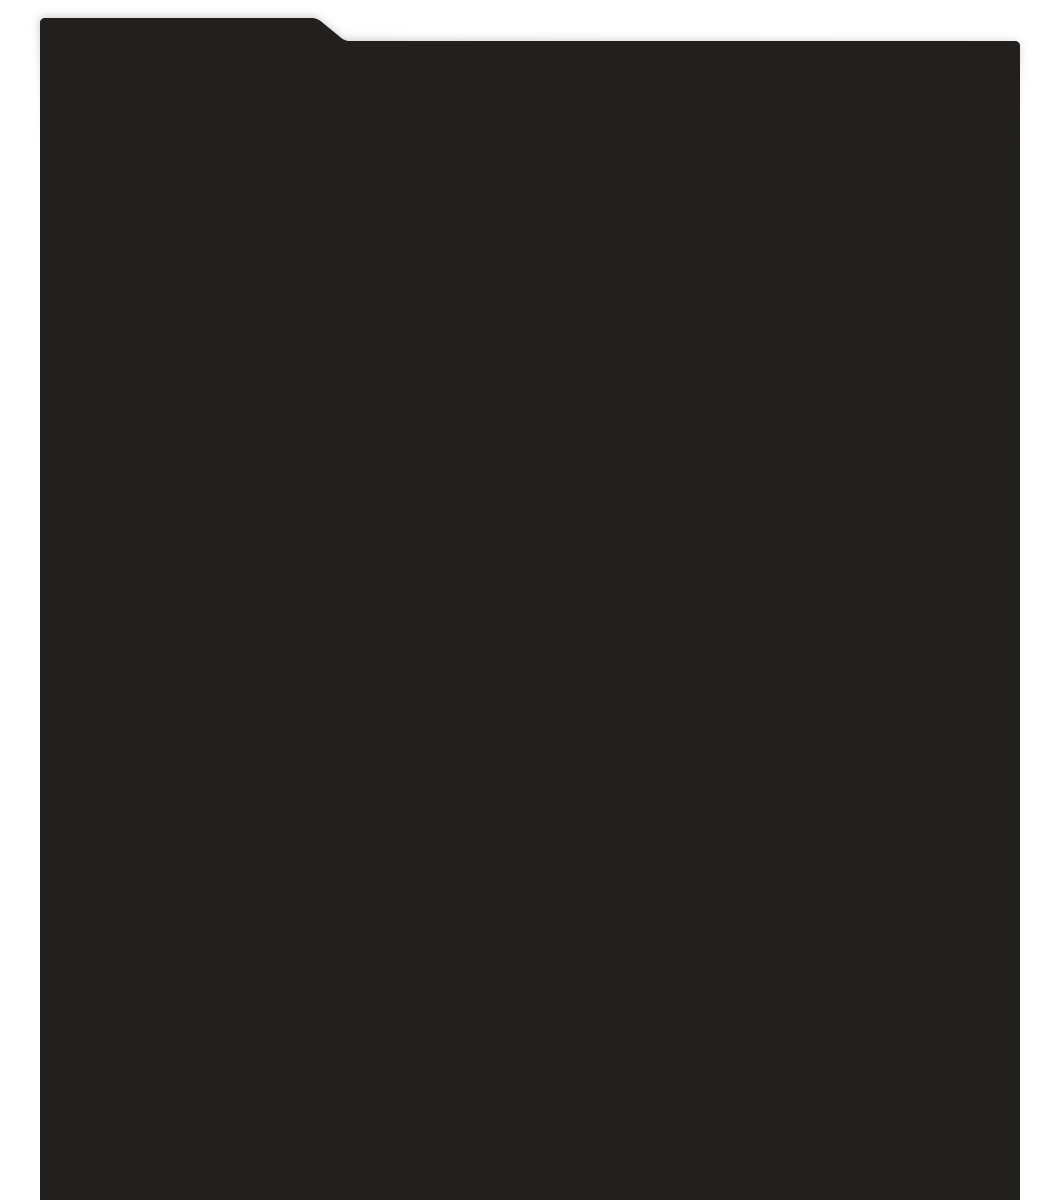
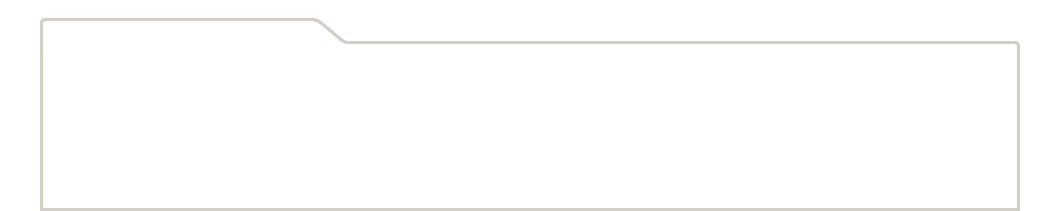
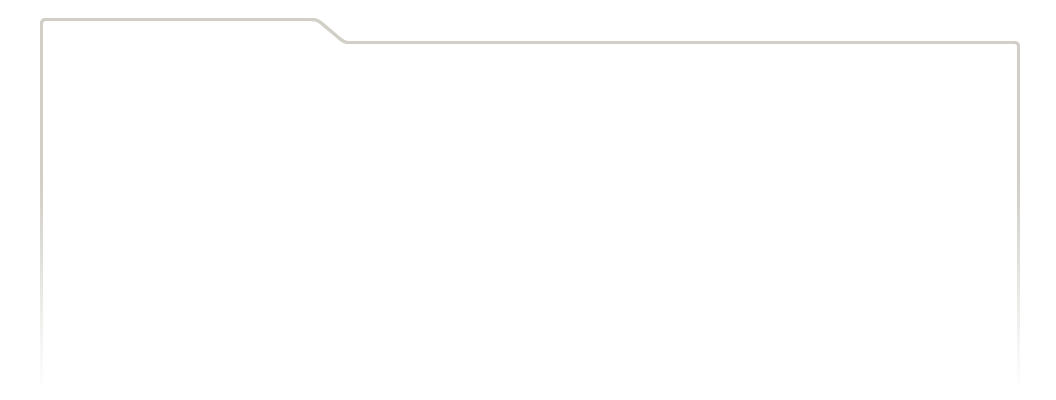
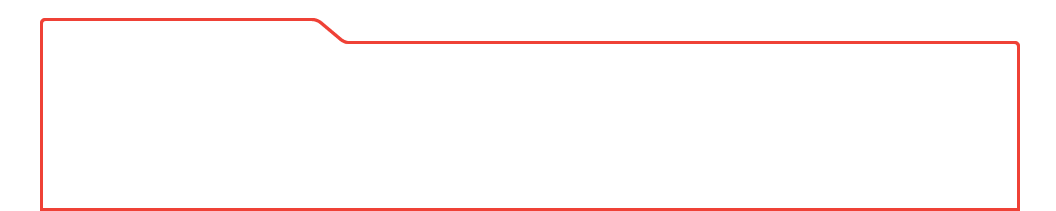
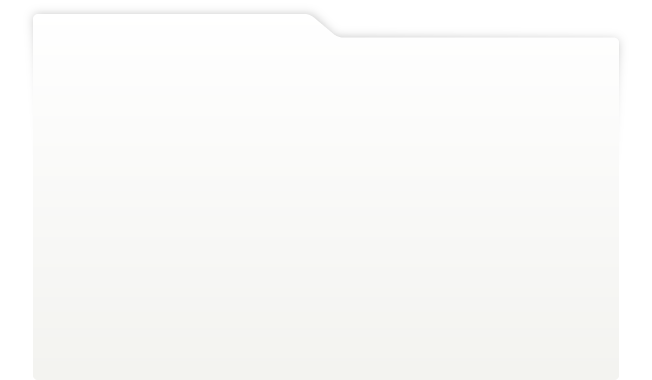
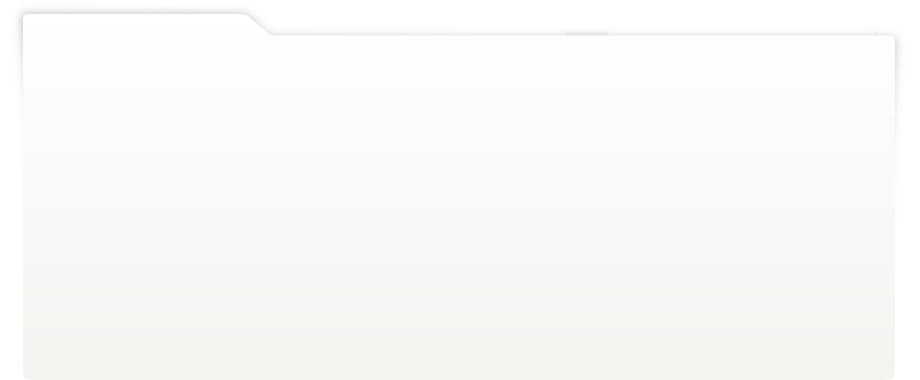
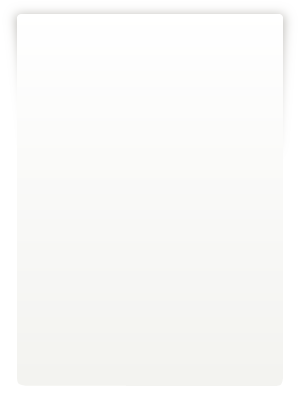
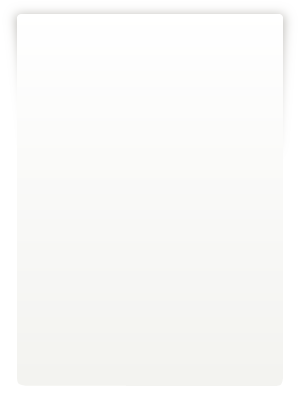
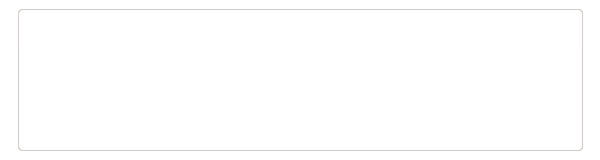
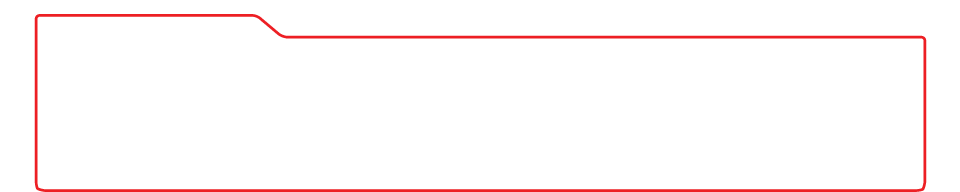
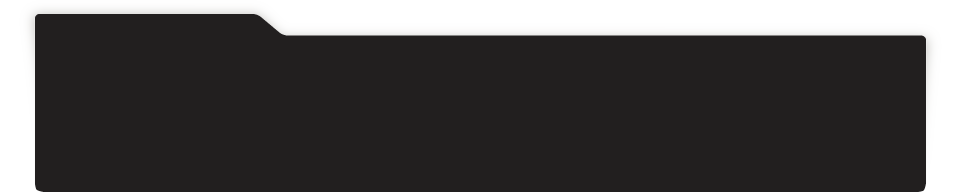
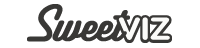
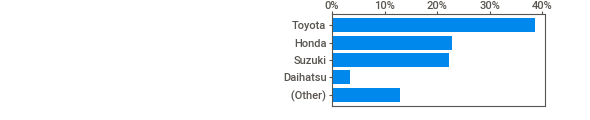
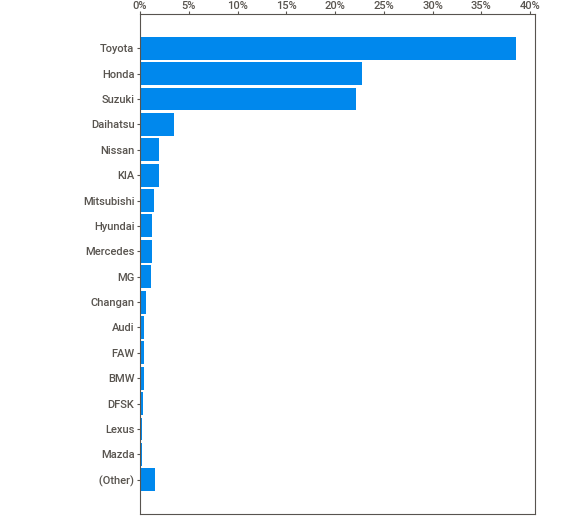
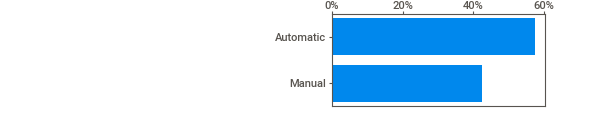
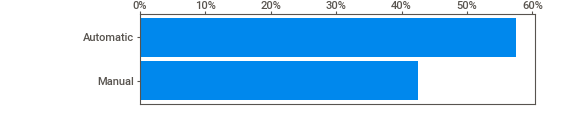
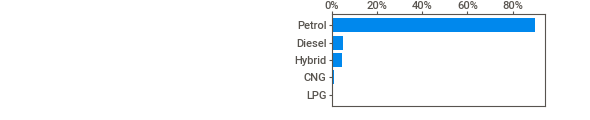
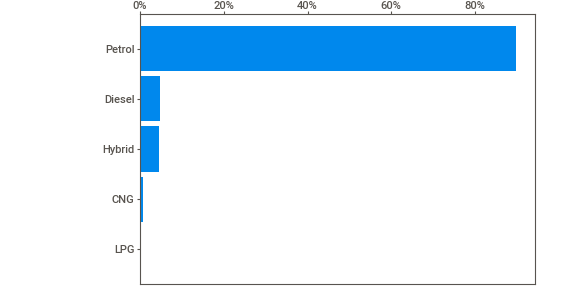
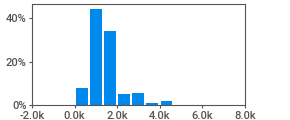
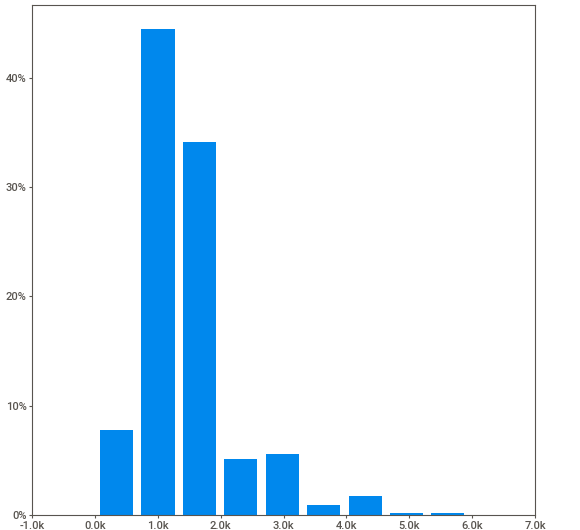
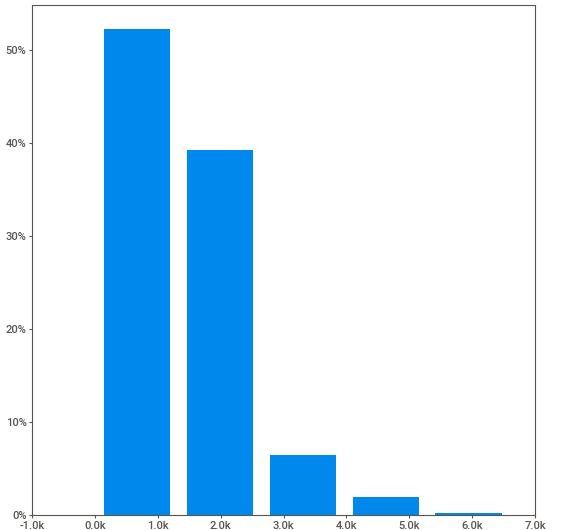
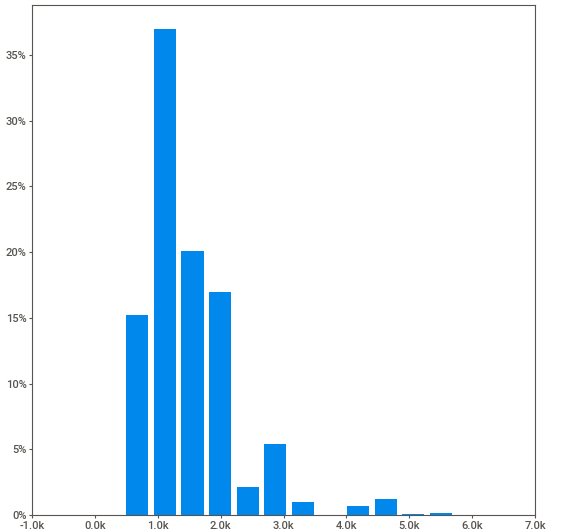
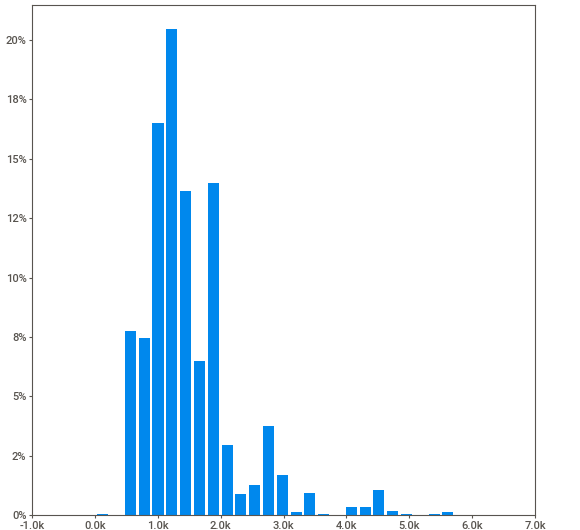
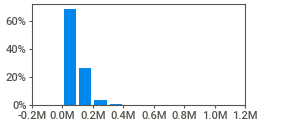
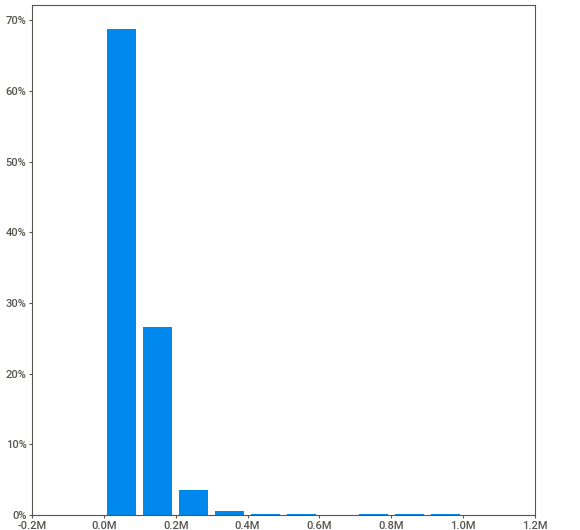
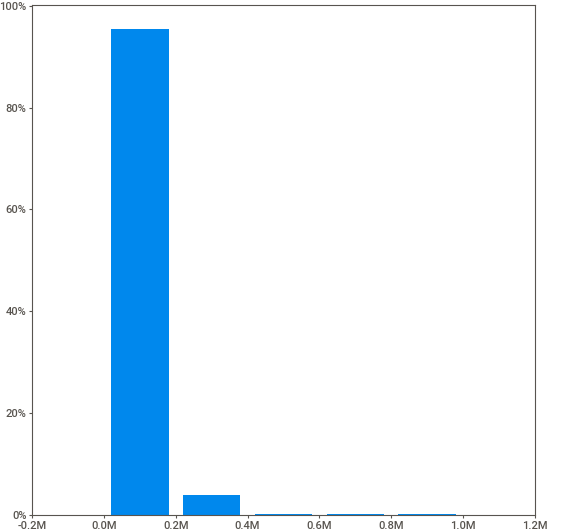
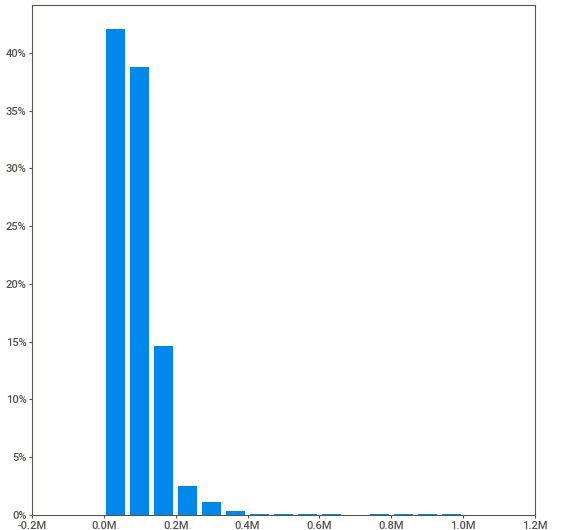
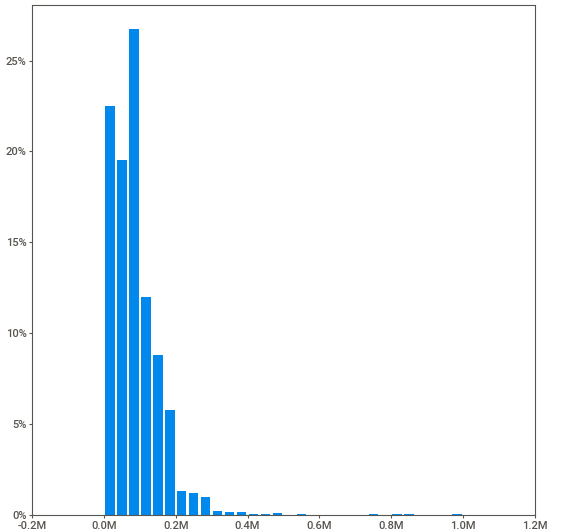
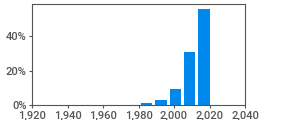
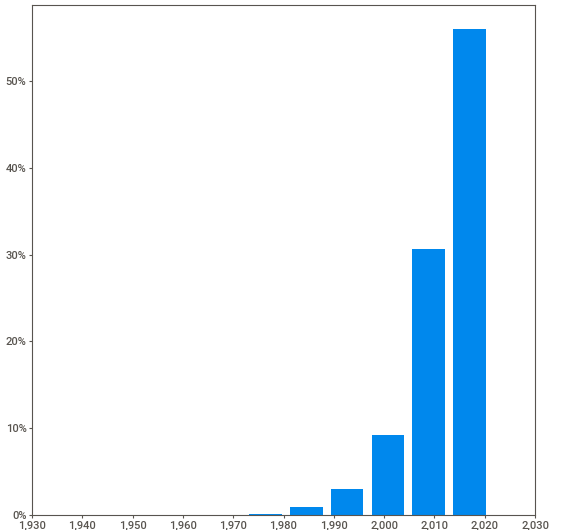
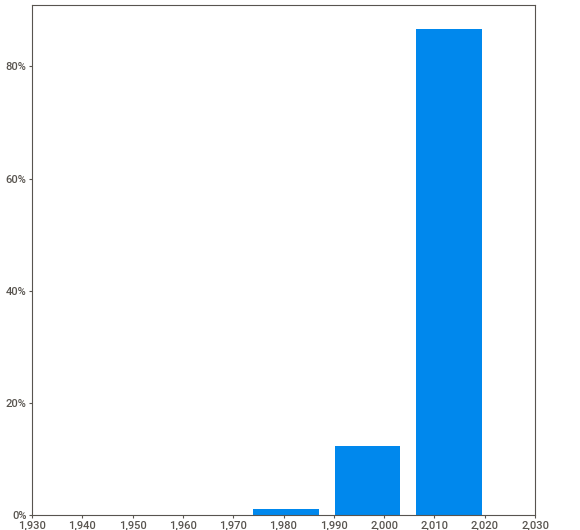
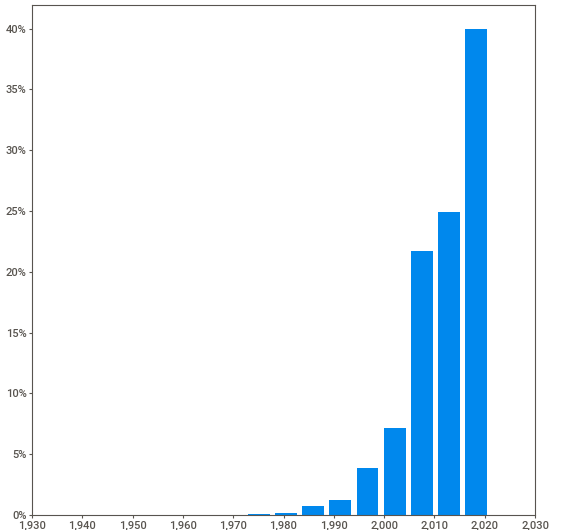
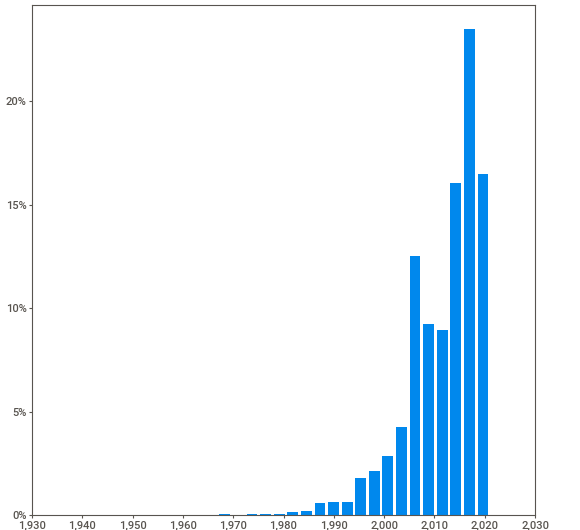
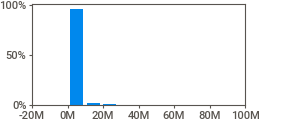
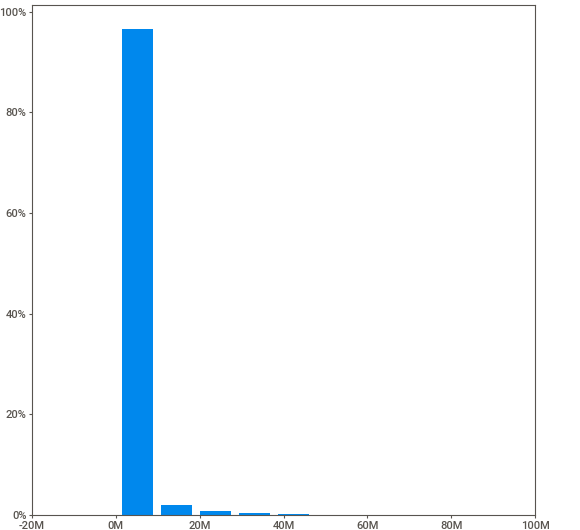
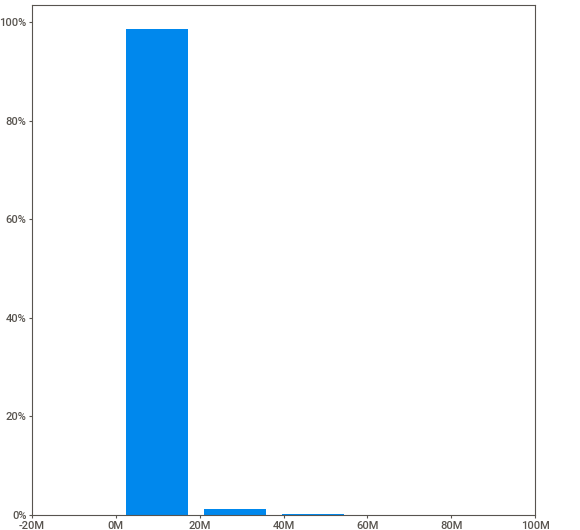
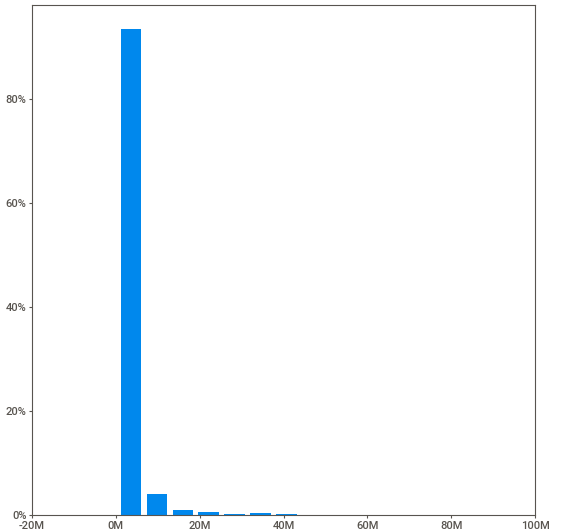
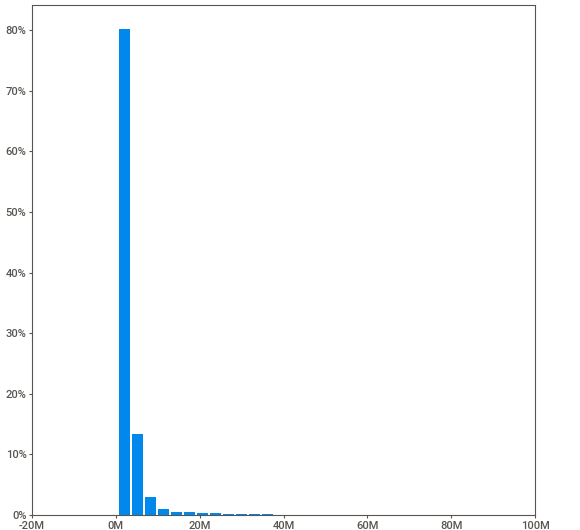
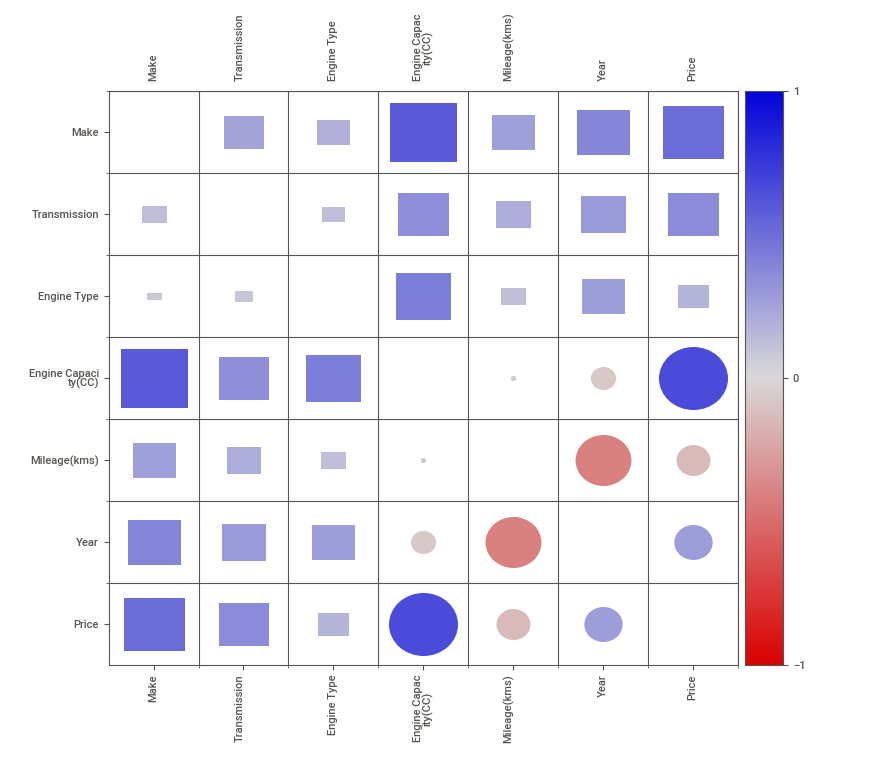
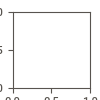

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Name', 'Price'])
y = np.log10(df[['Price']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((61352, 7), (15338, 7))

In [7]:
x.columns

Index(['Make', 'Transmission', 'Engine Type', 'Engine Capacity(CC)',
       'Mileage(kms)', 'City', 'Year'],
      dtype='object')

In [8]:
model = catboost.CatBoostRegressor(
    cat_features=['Make', 'Transmission', 'Engine Type', 'City'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000
)

In [9]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.2641066	test: 0.2558016	best: 0.2558016 (0)	total: 71.7ms	remaining: 2m 23s
1:	learn: 0.2189277	test: 0.2125113	best: 0.2125113 (1)	total: 88.3ms	remaining: 1m 28s
2:	learn: 0.1831946	test: 0.1779788	best: 0.1779788 (2)	total: 101ms	remaining: 1m 6s
3:	learn: 0.1528944	test: 0.1481628	best: 0.1481628 (3)	total: 112ms	remaining: 55.7s
4:	learn: 0.1256361	test: 0.1213395	best: 0.1213395 (4)	total: 118ms	remaining: 47.2s
5:	learn: 0.1000459	test: 0.0959276	best: 0.0959276 (5)	total: 128ms	remaining: 42.5s
6:	learn: 0.0760692	test: 0.0721159	best: 0.0721159 (6)	total: 136ms	remaining: 38.7s
7:	learn: 0.0522350	test: 0.0483841	best: 0.0483841 (7)	total: 145ms	remaining: 36.1s
8:	learn: 0.0298828	test: 0.0261054	best: 0.0261054 (8)	total: 154ms	remaining: 34.2s
9:	learn: 0.0098844	test: 0.0064392	best: 0.0064392 (9)	total: 164ms	remaining: 32.5s
10:	learn: -0.0118390	test: -0.0151899	best: -0.0151899 (10)	total: 173ms	remaining: 31.3s
11:	learn: -0.0328260	test: -0.0360570	best: 

108:	learn: -1.0444174	test: -1.0466071	best: -1.0466071 (108)	total: 1.09s	remaining: 19s
109:	learn: -1.0488794	test: -1.0506161	best: -1.0506161 (109)	total: 1.1s	remaining: 19s
110:	learn: -1.0541677	test: -1.0560840	best: -1.0560840 (110)	total: 1.11s	remaining: 19s
111:	learn: -1.0565793	test: -1.0584529	best: -1.0584529 (111)	total: 1.12s	remaining: 18.9s
112:	learn: -1.0604026	test: -1.0622469	best: -1.0622469 (112)	total: 1.13s	remaining: 18.9s
113:	learn: -1.0633265	test: -1.0642461	best: -1.0642461 (113)	total: 1.14s	remaining: 18.9s
114:	learn: -1.0660812	test: -1.0670497	best: -1.0670497 (114)	total: 1.15s	remaining: 18.9s
115:	learn: -1.0694871	test: -1.0706435	best: -1.0706435 (115)	total: 1.16s	remaining: 18.8s
116:	learn: -1.0736403	test: -1.0745154	best: -1.0745154 (116)	total: 1.17s	remaining: 18.8s
117:	learn: -1.0755075	test: -1.0762950	best: -1.0762950 (117)	total: 1.18s	remaining: 18.8s
118:	learn: -1.0778416	test: -1.0785356	best: -1.0785356 (118)	total: 1.19s	r

214:	learn: -1.2302604	test: -1.2211132	best: -1.2211132 (214)	total: 2.12s	remaining: 17.6s
215:	learn: -1.2316050	test: -1.2222428	best: -1.2222428 (215)	total: 2.13s	remaining: 17.6s
216:	learn: -1.2322438	test: -1.2227865	best: -1.2227865 (216)	total: 2.14s	remaining: 17.6s
217:	learn: -1.2327340	test: -1.2231593	best: -1.2231593 (217)	total: 2.15s	remaining: 17.6s
218:	learn: -1.2335340	test: -1.2237160	best: -1.2237160 (218)	total: 2.16s	remaining: 17.6s
219:	learn: -1.2339329	test: -1.2239635	best: -1.2239635 (219)	total: 2.17s	remaining: 17.6s
220:	learn: -1.2343803	test: -1.2243606	best: -1.2243606 (220)	total: 2.18s	remaining: 17.5s
221:	learn: -1.2355400	test: -1.2250702	best: -1.2250702 (221)	total: 2.19s	remaining: 17.5s
222:	learn: -1.2362495	test: -1.2256216	best: -1.2256216 (222)	total: 2.19s	remaining: 17.5s
223:	learn: -1.2380451	test: -1.2274401	best: -1.2274401 (223)	total: 2.2s	remaining: 17.5s
224:	learn: -1.2388837	test: -1.2280204	best: -1.2280204 (224)	total: 2

305:	learn: -1.3007629	test: -1.2852048	best: -1.2852048 (305)	total: 2.94s	remaining: 16.3s
306:	learn: -1.3018477	test: -1.2861376	best: -1.2861376 (306)	total: 2.95s	remaining: 16.2s
307:	learn: -1.3027973	test: -1.2869445	best: -1.2869445 (307)	total: 2.96s	remaining: 16.2s
308:	learn: -1.3038371	test: -1.2878655	best: -1.2878655 (308)	total: 2.96s	remaining: 16.2s
309:	learn: -1.3043016	test: -1.2883566	best: -1.2883566 (309)	total: 2.97s	remaining: 16.2s
310:	learn: -1.3054213	test: -1.2892617	best: -1.2892617 (310)	total: 2.98s	remaining: 16.2s
311:	learn: -1.3068640	test: -1.2904671	best: -1.2904671 (311)	total: 2.99s	remaining: 16.2s
312:	learn: -1.3080868	test: -1.2915828	best: -1.2915828 (312)	total: 3s	remaining: 16.2s
313:	learn: -1.3091913	test: -1.2925195	best: -1.2925195 (313)	total: 3.01s	remaining: 16.2s
314:	learn: -1.3095584	test: -1.2928382	best: -1.2928382 (314)	total: 3.02s	remaining: 16.2s
315:	learn: -1.3102005	test: -1.2934273	best: -1.2934273 (315)	total: 3.0

415:	learn: -1.3707449	test: -1.3443148	best: -1.3443148 (415)	total: 3.96s	remaining: 15.1s
416:	learn: -1.3715144	test: -1.3448978	best: -1.3448978 (416)	total: 3.98s	remaining: 15.1s
417:	learn: -1.3723836	test: -1.3457074	best: -1.3457074 (417)	total: 3.99s	remaining: 15.1s
418:	learn: -1.3730314	test: -1.3464522	best: -1.3464522 (418)	total: 4s	remaining: 15.1s
419:	learn: -1.3735660	test: -1.3469259	best: -1.3469259 (419)	total: 4s	remaining: 15.1s
420:	learn: -1.3741914	test: -1.3474552	best: -1.3474552 (420)	total: 4.01s	remaining: 15.1s
421:	learn: -1.3747530	test: -1.3477259	best: -1.3477259 (421)	total: 4.02s	remaining: 15s
422:	learn: -1.3752838	test: -1.3479560	best: -1.3479560 (422)	total: 4.03s	remaining: 15s
423:	learn: -1.3757176	test: -1.3483032	best: -1.3483032 (423)	total: 4.04s	remaining: 15s
424:	learn: -1.3766124	test: -1.3490877	best: -1.3490877 (424)	total: 4.05s	remaining: 15s
425:	learn: -1.3768085	test: -1.3491482	best: -1.3491482 (425)	total: 4.06s	remainin

517:	learn: -1.4124929	test: -1.3767064	best: -1.3767064 (517)	total: 4.99s	remaining: 14.3s
518:	learn: -1.4130469	test: -1.3771534	best: -1.3771534 (518)	total: 5s	remaining: 14.3s
519:	learn: -1.4137886	test: -1.3779935	best: -1.3779935 (519)	total: 5.01s	remaining: 14.3s
520:	learn: -1.4141669	test: -1.3782248	best: -1.3782248 (520)	total: 5.03s	remaining: 14.3s
521:	learn: -1.4150273	test: -1.3789021	best: -1.3789021 (521)	total: 5.04s	remaining: 14.3s
522:	learn: -1.4152052	test: -1.3789626	best: -1.3789626 (522)	total: 5.05s	remaining: 14.3s
523:	learn: -1.4159504	test: -1.3796987	best: -1.3796987 (523)	total: 5.07s	remaining: 14.3s
524:	learn: -1.4165177	test: -1.3803385	best: -1.3803385 (524)	total: 5.08s	remaining: 14.3s
525:	learn: -1.4169989	test: -1.3807701	best: -1.3807701 (525)	total: 5.09s	remaining: 14.3s
526:	learn: -1.4173231	test: -1.3810206	best: -1.3810206 (526)	total: 5.1s	remaining: 14.3s
527:	learn: -1.4174762	test: -1.3811206	best: -1.3811206 (527)	total: 5.11

618:	learn: -1.4408307	test: -1.3966516	best: -1.3966516 (618)	total: 6.01s	remaining: 13.4s
619:	learn: -1.4409643	test: -1.3966958	best: -1.3966958 (619)	total: 6.03s	remaining: 13.4s
620:	learn: -1.4414726	test: -1.3973337	best: -1.3973337 (620)	total: 6.04s	remaining: 13.4s
621:	learn: -1.4417282	test: -1.3974123	best: -1.3974123 (621)	total: 6.05s	remaining: 13.4s
622:	learn: -1.4418796	test: -1.3974340	best: -1.3974340 (622)	total: 6.06s	remaining: 13.4s
623:	learn: -1.4419971	test: -1.3975100	best: -1.3975100 (623)	total: 6.07s	remaining: 13.4s
624:	learn: -1.4422719	test: -1.3978362	best: -1.3978362 (624)	total: 6.08s	remaining: 13.4s
625:	learn: -1.4424631	test: -1.3978518	best: -1.3978518 (625)	total: 6.09s	remaining: 13.4s
626:	learn: -1.4425422	test: -1.3978486	best: -1.3978518 (625)	total: 6.09s	remaining: 13.3s
627:	learn: -1.4426185	test: -1.3978440	best: -1.3978518 (625)	total: 6.1s	remaining: 13.3s
628:	learn: -1.4427295	test: -1.3978240	best: -1.3978518 (625)	total: 6

711:	learn: -1.4566106	test: -1.4058644	best: -1.4058837 (710)	total: 6.83s	remaining: 12.4s
712:	learn: -1.4569351	test: -1.4061282	best: -1.4061282 (712)	total: 6.84s	remaining: 12.3s
713:	learn: -1.4571967	test: -1.4063388	best: -1.4063388 (713)	total: 6.85s	remaining: 12.3s
714:	learn: -1.4572953	test: -1.4063701	best: -1.4063701 (714)	total: 6.86s	remaining: 12.3s
715:	learn: -1.4575029	test: -1.4065160	best: -1.4065160 (715)	total: 6.87s	remaining: 12.3s
716:	learn: -1.4575287	test: -1.4063959	best: -1.4065160 (715)	total: 6.87s	remaining: 12.3s
717:	learn: -1.4576395	test: -1.4064082	best: -1.4065160 (715)	total: 6.88s	remaining: 12.3s
718:	learn: -1.4577435	test: -1.4063774	best: -1.4065160 (715)	total: 6.89s	remaining: 12.3s
719:	learn: -1.4580410	test: -1.4066320	best: -1.4066320 (719)	total: 6.9s	remaining: 12.3s
720:	learn: -1.4582044	test: -1.4067903	best: -1.4067903 (720)	total: 6.91s	remaining: 12.3s
721:	learn: -1.4585817	test: -1.4070159	best: -1.4070159 (721)	total: 6

803:	learn: -1.4710815	test: -1.4127809	best: -1.4127809 (803)	total: 7.64s	remaining: 11.4s
804:	learn: -1.4713789	test: -1.4129159	best: -1.4129159 (804)	total: 7.65s	remaining: 11.4s
805:	learn: -1.4716445	test: -1.4131479	best: -1.4131479 (805)	total: 7.66s	remaining: 11.3s
806:	learn: -1.4717198	test: -1.4131584	best: -1.4131584 (806)	total: 7.67s	remaining: 11.3s
807:	learn: -1.4718081	test: -1.4132305	best: -1.4132305 (807)	total: 7.67s	remaining: 11.3s
808:	learn: -1.4719515	test: -1.4132577	best: -1.4132577 (808)	total: 7.68s	remaining: 11.3s
809:	learn: -1.4719858	test: -1.4133835	best: -1.4133835 (809)	total: 7.69s	remaining: 11.3s
810:	learn: -1.4720766	test: -1.4132173	best: -1.4133835 (809)	total: 7.7s	remaining: 11.3s
811:	learn: -1.4723201	test: -1.4134483	best: -1.4134483 (811)	total: 7.71s	remaining: 11.3s
812:	learn: -1.4723870	test: -1.4134514	best: -1.4134514 (812)	total: 7.72s	remaining: 11.3s
813:	learn: -1.4725188	test: -1.4135005	best: -1.4135005 (813)	total: 7

913:	learn: -1.4855930	test: -1.4165870	best: -1.4169138 (899)	total: 8.65s	remaining: 10.3s
914:	learn: -1.4857001	test: -1.4165652	best: -1.4169138 (899)	total: 8.66s	remaining: 10.3s
915:	learn: -1.4857229	test: -1.4165764	best: -1.4169138 (899)	total: 8.67s	remaining: 10.3s
916:	learn: -1.4859645	test: -1.4166765	best: -1.4169138 (899)	total: 8.68s	remaining: 10.3s
917:	learn: -1.4860183	test: -1.4166694	best: -1.4169138 (899)	total: 8.69s	remaining: 10.2s
918:	learn: -1.4861401	test: -1.4168705	best: -1.4169138 (899)	total: 8.7s	remaining: 10.2s
919:	learn: -1.4862226	test: -1.4168569	best: -1.4169138 (899)	total: 8.71s	remaining: 10.2s
920:	learn: -1.4863191	test: -1.4169150	best: -1.4169150 (920)	total: 8.72s	remaining: 10.2s
921:	learn: -1.4864987	test: -1.4168814	best: -1.4169150 (920)	total: 8.73s	remaining: 10.2s
922:	learn: -1.4866259	test: -1.4168960	best: -1.4169150 (920)	total: 8.74s	remaining: 10.2s
923:	learn: -1.4867513	test: -1.4168124	best: -1.4169150 (920)	total: 8

1018:	learn: -1.4952945	test: -1.4175096	best: -1.4175188 (971)	total: 9.67s	remaining: 9.31s
1019:	learn: -1.4953158	test: -1.4175157	best: -1.4175188 (971)	total: 9.68s	remaining: 9.3s
1020:	learn: -1.4953772	test: -1.4174997	best: -1.4175188 (971)	total: 9.69s	remaining: 9.29s
1021:	learn: -1.4954482	test: -1.4175137	best: -1.4175188 (971)	total: 9.7s	remaining: 9.28s
1022:	learn: -1.4954864	test: -1.4175010	best: -1.4175188 (971)	total: 9.71s	remaining: 9.27s
1023:	learn: -1.4955715	test: -1.4174815	best: -1.4175188 (971)	total: 9.71s	remaining: 9.26s
1024:	learn: -1.4955835	test: -1.4174553	best: -1.4175188 (971)	total: 9.72s	remaining: 9.25s
1025:	learn: -1.4956148	test: -1.4174156	best: -1.4175188 (971)	total: 9.73s	remaining: 9.24s
1026:	learn: -1.4956700	test: -1.4173642	best: -1.4175188 (971)	total: 9.74s	remaining: 9.23s
1027:	learn: -1.4957440	test: -1.4173736	best: -1.4175188 (971)	total: 9.75s	remaining: 9.22s
1028:	learn: -1.4958432	test: -1.4172309	best: -1.4175188 (971

1123:	learn: -1.5061150	test: -1.4208608	best: -1.4208608 (1123)	total: 10.7s	remaining: 8.34s
1124:	learn: -1.5061853	test: -1.4208250	best: -1.4208608 (1123)	total: 10.7s	remaining: 8.33s
1125:	learn: -1.5062196	test: -1.4207646	best: -1.4208608 (1123)	total: 10.7s	remaining: 8.32s
1126:	learn: -1.5062385	test: -1.4207997	best: -1.4208608 (1123)	total: 10.7s	remaining: 8.31s
1127:	learn: -1.5063784	test: -1.4207666	best: -1.4208608 (1123)	total: 10.7s	remaining: 8.3s
1128:	learn: -1.5070755	test: -1.4214147	best: -1.4214147 (1128)	total: 10.7s	remaining: 8.29s
1129:	learn: -1.5070944	test: -1.4213839	best: -1.4214147 (1128)	total: 10.8s	remaining: 8.28s
1130:	learn: -1.5071826	test: -1.4214115	best: -1.4214147 (1128)	total: 10.8s	remaining: 8.27s
1131:	learn: -1.5073404	test: -1.4214446	best: -1.4214446 (1131)	total: 10.8s	remaining: 8.26s
1132:	learn: -1.5074621	test: -1.4214628	best: -1.4214628 (1132)	total: 10.8s	remaining: 8.25s
1133:	learn: -1.5075527	test: -1.4214167	best: -1.4

1230:	learn: -1.5189427	test: -1.4244186	best: -1.4244186 (1230)	total: 11.7s	remaining: 7.32s
1231:	learn: -1.5190351	test: -1.4243944	best: -1.4244186 (1230)	total: 11.7s	remaining: 7.31s
1232:	learn: -1.5191955	test: -1.4243731	best: -1.4244186 (1230)	total: 11.7s	remaining: 7.3s
1233:	learn: -1.5193545	test: -1.4244604	best: -1.4244604 (1233)	total: 11.7s	remaining: 7.29s
1234:	learn: -1.5196277	test: -1.4246428	best: -1.4246428 (1234)	total: 11.8s	remaining: 7.28s
1235:	learn: -1.5197341	test: -1.4246594	best: -1.4246594 (1235)	total: 11.8s	remaining: 7.27s
1236:	learn: -1.5197503	test: -1.4246162	best: -1.4246594 (1235)	total: 11.8s	remaining: 7.26s
1237:	learn: -1.5198520	test: -1.4245506	best: -1.4246594 (1235)	total: 11.8s	remaining: 7.25s
1238:	learn: -1.5199478	test: -1.4245798	best: -1.4246594 (1235)	total: 11.8s	remaining: 7.24s
1239:	learn: -1.5200053	test: -1.4246487	best: -1.4246594 (1235)	total: 11.8s	remaining: 7.23s
1240:	learn: -1.5200588	test: -1.4246834	best: -1.4

1319:	learn: -1.5262342	test: -1.4266323	best: -1.4267423 (1288)	total: 12.5s	remaining: 6.46s
1320:	learn: -1.5262449	test: -1.4266652	best: -1.4267423 (1288)	total: 12.5s	remaining: 6.45s
1321:	learn: -1.5262678	test: -1.4265835	best: -1.4267423 (1288)	total: 12.5s	remaining: 6.44s
1322:	learn: -1.5262880	test: -1.4265410	best: -1.4267423 (1288)	total: 12.6s	remaining: 6.43s
1323:	learn: -1.5264251	test: -1.4265969	best: -1.4267423 (1288)	total: 12.6s	remaining: 6.42s
1324:	learn: -1.5264455	test: -1.4265080	best: -1.4267423 (1288)	total: 12.6s	remaining: 6.41s
1325:	learn: -1.5266445	test: -1.4266406	best: -1.4267423 (1288)	total: 12.6s	remaining: 6.4s
1326:	learn: -1.5267185	test: -1.4266882	best: -1.4267423 (1288)	total: 12.6s	remaining: 6.39s
1327:	learn: -1.5267503	test: -1.4266613	best: -1.4267423 (1288)	total: 12.6s	remaining: 6.38s
1328:	learn: -1.5268290	test: -1.4267460	best: -1.4267460 (1328)	total: 12.6s	remaining: 6.37s
1329:	learn: -1.5269101	test: -1.4267459	best: -1.4

1421:	learn: -1.5329843	test: -1.4264513	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.51s
1422:	learn: -1.5330092	test: -1.4264484	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.5s
1423:	learn: -1.5330935	test: -1.4262934	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.49s
1424:	learn: -1.5331396	test: -1.4262707	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.48s
1425:	learn: -1.5331832	test: -1.4262363	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.47s
1426:	learn: -1.5332158	test: -1.4261876	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.46s
1427:	learn: -1.5332626	test: -1.4261679	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.45s
1428:	learn: -1.5333121	test: -1.4262159	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.44s
1429:	learn: -1.5334001	test: -1.4264328	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.43s
1430:	learn: -1.5334811	test: -1.4264417	best: -1.4271267 (1358)	total: 13.6s	remaining: 5.42s
1431:	learn: -1.5334872	test: -1.4264286	best: -1.4

1526:	learn: -1.5401149	test: -1.4265360	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.52s
1527:	learn: -1.5401542	test: -1.4266597	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.51s
1528:	learn: -1.5401951	test: -1.4266686	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.5s
1529:	learn: -1.5404760	test: -1.4268723	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.49s
1530:	learn: -1.5405031	test: -1.4267860	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.48s
1531:	learn: -1.5405540	test: -1.4270189	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.47s
1532:	learn: -1.5405873	test: -1.4270308	best: -1.4272645 (1486)	total: 14.6s	remaining: 4.46s
1533:	learn: -1.5406659	test: -1.4271090	best: -1.4272645 (1486)	total: 14.7s	remaining: 4.45s
1534:	learn: -1.5407052	test: -1.4271177	best: -1.4272645 (1486)	total: 14.7s	remaining: 4.44s
1535:	learn: -1.5408339	test: -1.4273686	best: -1.4273686 (1535)	total: 14.7s	remaining: 4.43s
1536:	learn: -1.5408876	test: -1.4274105	best: -1.4

1632:	learn: -1.5476310	test: -1.4276700	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.5s
1633:	learn: -1.5477174	test: -1.4276120	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.5s
1634:	learn: -1.5477388	test: -1.4274507	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.49s
1635:	learn: -1.5477528	test: -1.4274073	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.48s
1636:	learn: -1.5477992	test: -1.4274337	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.46s
1637:	learn: -1.5478198	test: -1.4273003	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.46s
1638:	learn: -1.5478616	test: -1.4272873	best: -1.4282375 (1547)	total: 15.6s	remaining: 3.45s
1639:	learn: -1.5478812	test: -1.4272678	best: -1.4282375 (1547)	total: 15.7s	remaining: 3.44s
1640:	learn: -1.5479087	test: -1.4272293	best: -1.4282375 (1547)	total: 15.7s	remaining: 3.43s
1641:	learn: -1.5479139	test: -1.4271966	best: -1.4282375 (1547)	total: 15.7s	remaining: 3.42s
1642:	learn: -1.5479281	test: -1.4271405	best: -1.42

1734:	learn: -1.5525318	test: -1.4250854	best: -1.4282375 (1547)	total: 16.6s	remaining: 2.54s
1735:	learn: -1.5525764	test: -1.4251471	best: -1.4282375 (1547)	total: 16.6s	remaining: 2.53s
1736:	learn: -1.5526923	test: -1.4253022	best: -1.4282375 (1547)	total: 16.6s	remaining: 2.52s
1737:	learn: -1.5527401	test: -1.4254048	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.51s
1738:	learn: -1.5527883	test: -1.4254351	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.5s
1739:	learn: -1.5528455	test: -1.4253994	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.49s
1740:	learn: -1.5528676	test: -1.4253719	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.48s
1741:	learn: -1.5529066	test: -1.4252981	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.47s
1742:	learn: -1.5529262	test: -1.4252533	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.46s
1743:	learn: -1.5529323	test: -1.4252338	best: -1.4282375 (1547)	total: 16.7s	remaining: 2.45s
1744:	learn: -1.5529537	test: -1.4251726	best: -1.4

1838:	learn: -1.5573009	test: -1.4235125	best: -1.4282375 (1547)	total: 17.6s	remaining: 1.54s
1839:	learn: -1.5573144	test: -1.4233150	best: -1.4282375 (1547)	total: 17.6s	remaining: 1.53s
1840:	learn: -1.5573402	test: -1.4234411	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.52s
1841:	learn: -1.5573759	test: -1.4234325	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.51s
1842:	learn: -1.5574135	test: -1.4236591	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.5s
1843:	learn: -1.5574636	test: -1.4235593	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.5s
1844:	learn: -1.5575208	test: -1.4235727	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.49s
1845:	learn: -1.5576159	test: -1.4235758	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.48s
1846:	learn: -1.5576525	test: -1.4234239	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.47s
1847:	learn: -1.5577230	test: -1.4234621	best: -1.4282375 (1547)	total: 17.7s	remaining: 1.46s
1848:	learn: -1.5577951	test: -1.4234671	best: -1.42

1942:	learn: -1.5622190	test: -1.4199971	best: -1.4282375 (1547)	total: 18.6s	remaining: 547ms
1943:	learn: -1.5622331	test: -1.4199313	best: -1.4282375 (1547)	total: 18.7s	remaining: 537ms
1944:	learn: -1.5623746	test: -1.4201985	best: -1.4282375 (1547)	total: 18.7s	remaining: 528ms
1945:	learn: -1.5623922	test: -1.4201711	best: -1.4282375 (1547)	total: 18.7s	remaining: 518ms
1946:	learn: -1.5624757	test: -1.4202675	best: -1.4282375 (1547)	total: 18.7s	remaining: 509ms
1947:	learn: -1.5625173	test: -1.4203718	best: -1.4282375 (1547)	total: 18.7s	remaining: 499ms
1948:	learn: -1.5625780	test: -1.4205900	best: -1.4282375 (1547)	total: 18.7s	remaining: 490ms
1949:	learn: -1.5625859	test: -1.4205575	best: -1.4282375 (1547)	total: 18.7s	remaining: 480ms
1950:	learn: -1.5626029	test: -1.4203819	best: -1.4282375 (1547)	total: 18.7s	remaining: 470ms
1951:	learn: -1.5626486	test: -1.4203524	best: -1.4282375 (1547)	total: 18.7s	remaining: 461ms
1952:	learn: -1.5626970	test: -1.4204632	best: -1.

In [10]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [11]:
calculate_nll_catboost(model, x_train, y_train)

-1.5012892285991626

In [12]:
calculate_nll_catboost(model, x_test, y_test)

-1.4309796506574795

In [13]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 1, 2, 5], 
    loss_function="RMSEWithUncertainty",
    depth=5,
    num_trees=100,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(100, 100, 50), context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [14]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=50, batch_size=2048, verbose=True)

0:	learn: 0.2664005	total: 6.06ms	remaining: 600ms
1:	learn: 0.2251901	total: 11.7ms	remaining: 572ms
2:	learn: 0.1907927	total: 16.9ms	remaining: 545ms
3:	learn: 0.1624650	total: 21.4ms	remaining: 515ms
4:	learn: 0.1351540	total: 26ms	remaining: 493ms
5:	learn: 0.1125436	total: 30.9ms	remaining: 484ms
6:	learn: 0.0875813	total: 35.8ms	remaining: 476ms
7:	learn: 0.0656816	total: 40.4ms	remaining: 464ms
8:	learn: 0.0432492	total: 45.1ms	remaining: 456ms
9:	learn: 0.0222064	total: 49.6ms	remaining: 446ms
10:	learn: 0.0009076	total: 54.1ms	remaining: 438ms
11:	learn: -0.0175305	total: 58.6ms	remaining: 430ms
12:	learn: -0.0366026	total: 63.4ms	remaining: 425ms
13:	learn: -0.0567880	total: 68ms	remaining: 418ms
14:	learn: -0.0761290	total: 72.9ms	remaining: 413ms
15:	learn: -0.0963801	total: 77.7ms	remaining: 408ms
16:	learn: -0.1156562	total: 82.3ms	remaining: 402ms
17:	learn: -0.1319297	total: 86.8ms	remaining: 395ms
18:	learn: -0.1498205	total: 91.4ms	remaining: 390ms
19:	learn: -0.1667

val loss: -1.5647891759872437
train loss: -1.6885393857955933
val loss: -1.6186326742172241
Loading model from epoch 40.


TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7fc111d6e2e8>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7fc111d6e320>)

In [15]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-1.6479344

In [16]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-1.5858632

In [17]:
data = x_test.iloc[:10, :]

In [18]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

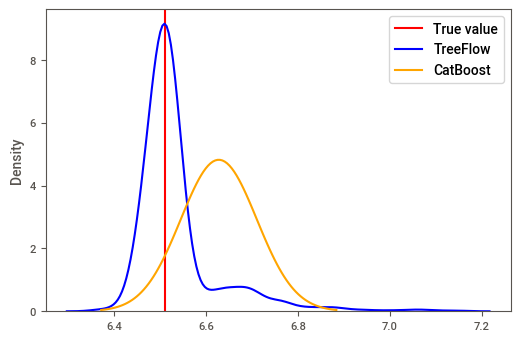

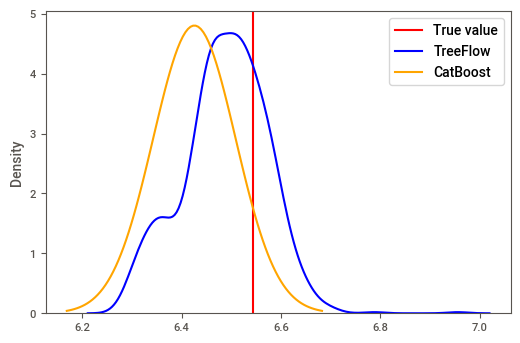

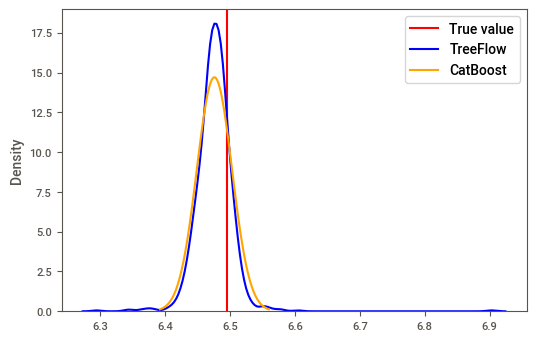

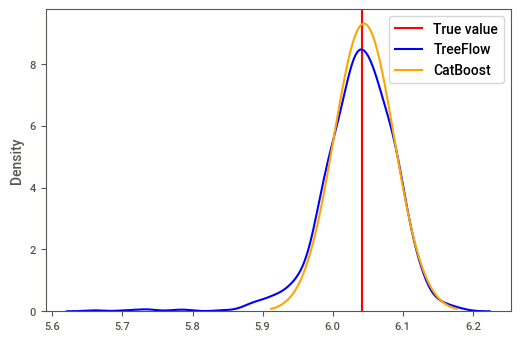

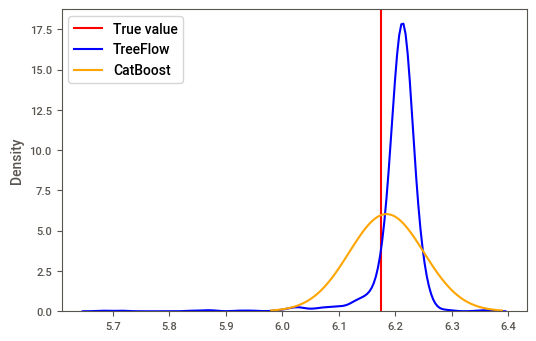

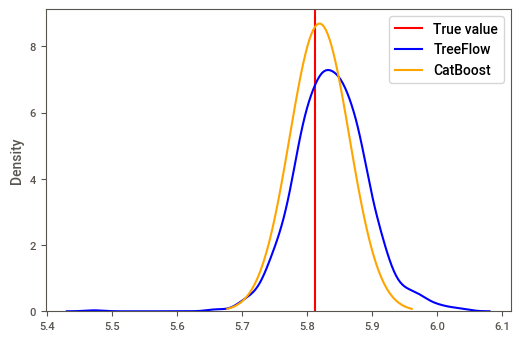

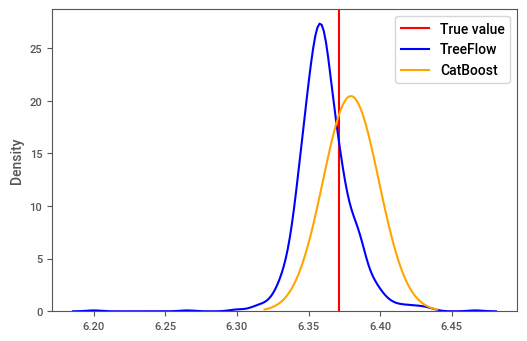

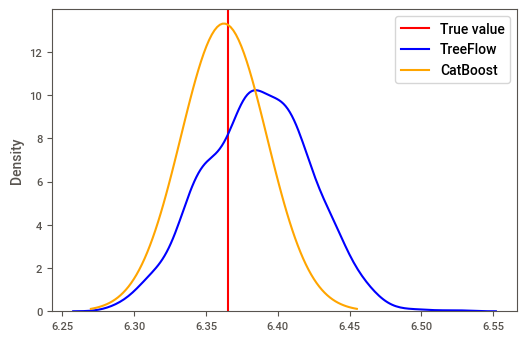

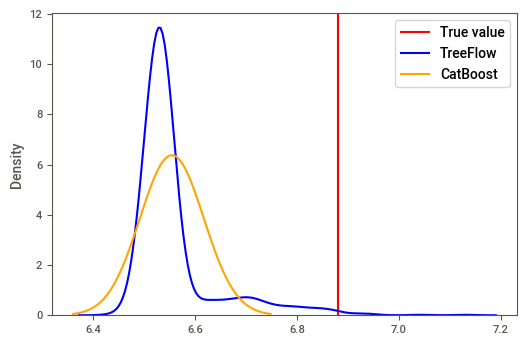

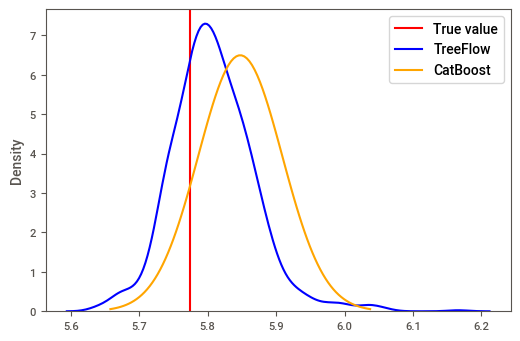

In [19]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()